In [211]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 50
sns.set_style("whitegrid")

import matplotlib
matplotlib.rc("font", family = "AppleGothic")
matplotlib.rc("axes", unicode_minus = False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [3]:
train=pd.read_csv("Desktop/phthon/Kaggle/bike-sharing.demand/train.csv",parse_dates=["datetime"])
print(train.shape)
train.head(2)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [4]:
test=pd.read_csv("Desktop/phthon/Kaggle/bike-sharing.demand/test.csv",parse_dates=["datetime"])
print(test.shape)
test.head(2)

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


# preprocessing

#### 1)날짜변형

In [5]:
# datetime을 정확히 알기위한 사전작업 실시

train["datetime"]=pd.to_datetime(train["datetime"])
train["datetime_year"]=train["datetime"].dt.year
train["datetime_month"]=train["datetime"].dt.month
train["datetime_day"]=train["datetime"].dt.day
train["datetime_hour"]=train["datetime"].dt.hour
train["datetime_minute"]=train["datetime"].dt.minute
train["datetime_second"]=train["datetime"].dt.second
train["datetime_dayofweek"]=train["datetime"].dt.dayofweek

train.head(2)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,datetime_dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5


In [6]:
test["datetime"]=pd.to_datetime(test["datetime"])

test["datetime_year"]=test["datetime"].dt.year
test["datetime_month"]=test["datetime"].dt.month
test["datetime_day"]=test["datetime"].dt.day
test["datetime_hour"]=test["datetime"].dt.hour
test["datetime_minute"]=test["datetime"].dt.minute
test["datetime_second"]=test["datetime"].dt.second
test["datetime_dayofweek"]=test["datetime"].dt.dayofweek

#### 3)windspeed=0 바꾸기

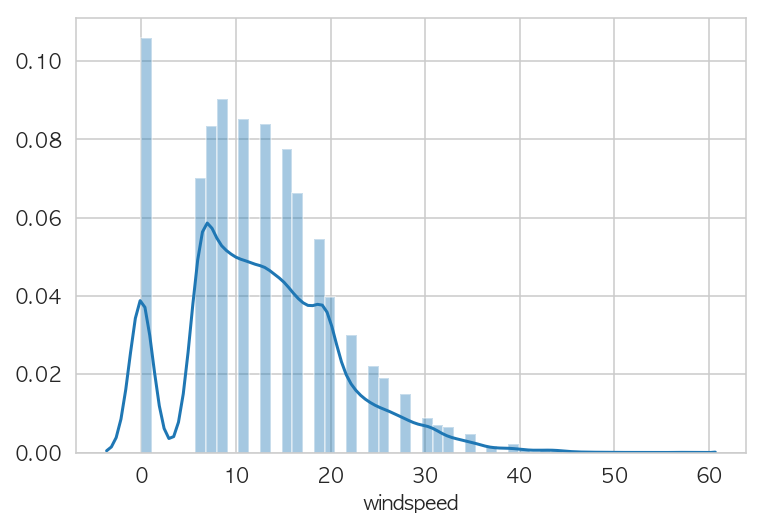

In [7]:
# train의 windspeed부분에서 0부분이 지나치게 높다
## 이를 통해 이 windspeed 부분에 문제가 있으며 / 이를 기존 주어진 정보를 통해 0에 있는걸 파악하는 작업이 선행되야 함을 의미
sns.distplot(train["windspeed"])

In [8]:
# train에서 windspeed의 수가 

windspeed_0=train.loc[train["windspeed"]==0]
windspeed_1=train.loc[train["windspeed"]!=0]
print(windspeed_0.shape)
print(windspeed_1.shape)
print(train.shape)
train.head(2)

(1313, 19)
(9573, 19)
(10886, 19)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,datetime_dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5


In [9]:
feature=["season","holiday","workingday","weather","temp","atemp","humidity","datetime_month","datetime_year",
         "datetime_day","datetime_hour","datetime_dayofweek"]
label=["windspeed"]

x_windspeed_1=windspeed_1[feature]
y_windspeed_1=windspeed_1[label]
x_windspeed_0=windspeed_0[feature]
x_windspeed_0.head()

,season,holiday,workingday,weather,temp,atemp,humidity,datetime_month,datetime_year,datetime_day,datetime_hour,datetime_dayofweek
0,1,0,0,1,9.84,14.395,81,1,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,1,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,1,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,1,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,1,2011,1,4,5


In [10]:
from sklearn.ensemble import RandomForestRegressor
s_model=RandomForestRegressor(n_jobs=-1,random_state=37)
s_model.fit(x_windspeed_1,y_windspeed_1)

s_prediction=s_model.predict(x_windspeed_0)
windspeed_0["windspeed"]=s_prediction
windspeed_0.head()


/Users/dddddddd/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dddddddd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dddddddd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,datetime_dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,9.70160,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,9.70093,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,8.60146,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,7.20250,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,7.30233,0,1,1,2011,1,1,4,0,0,5


In [11]:
train=pd.concat([windspeed_0,windspeed_1],axis=0)
train.loc[train["windspeed"]==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,datetime_dayofweek


# Explortory

### 1)상관관계연구

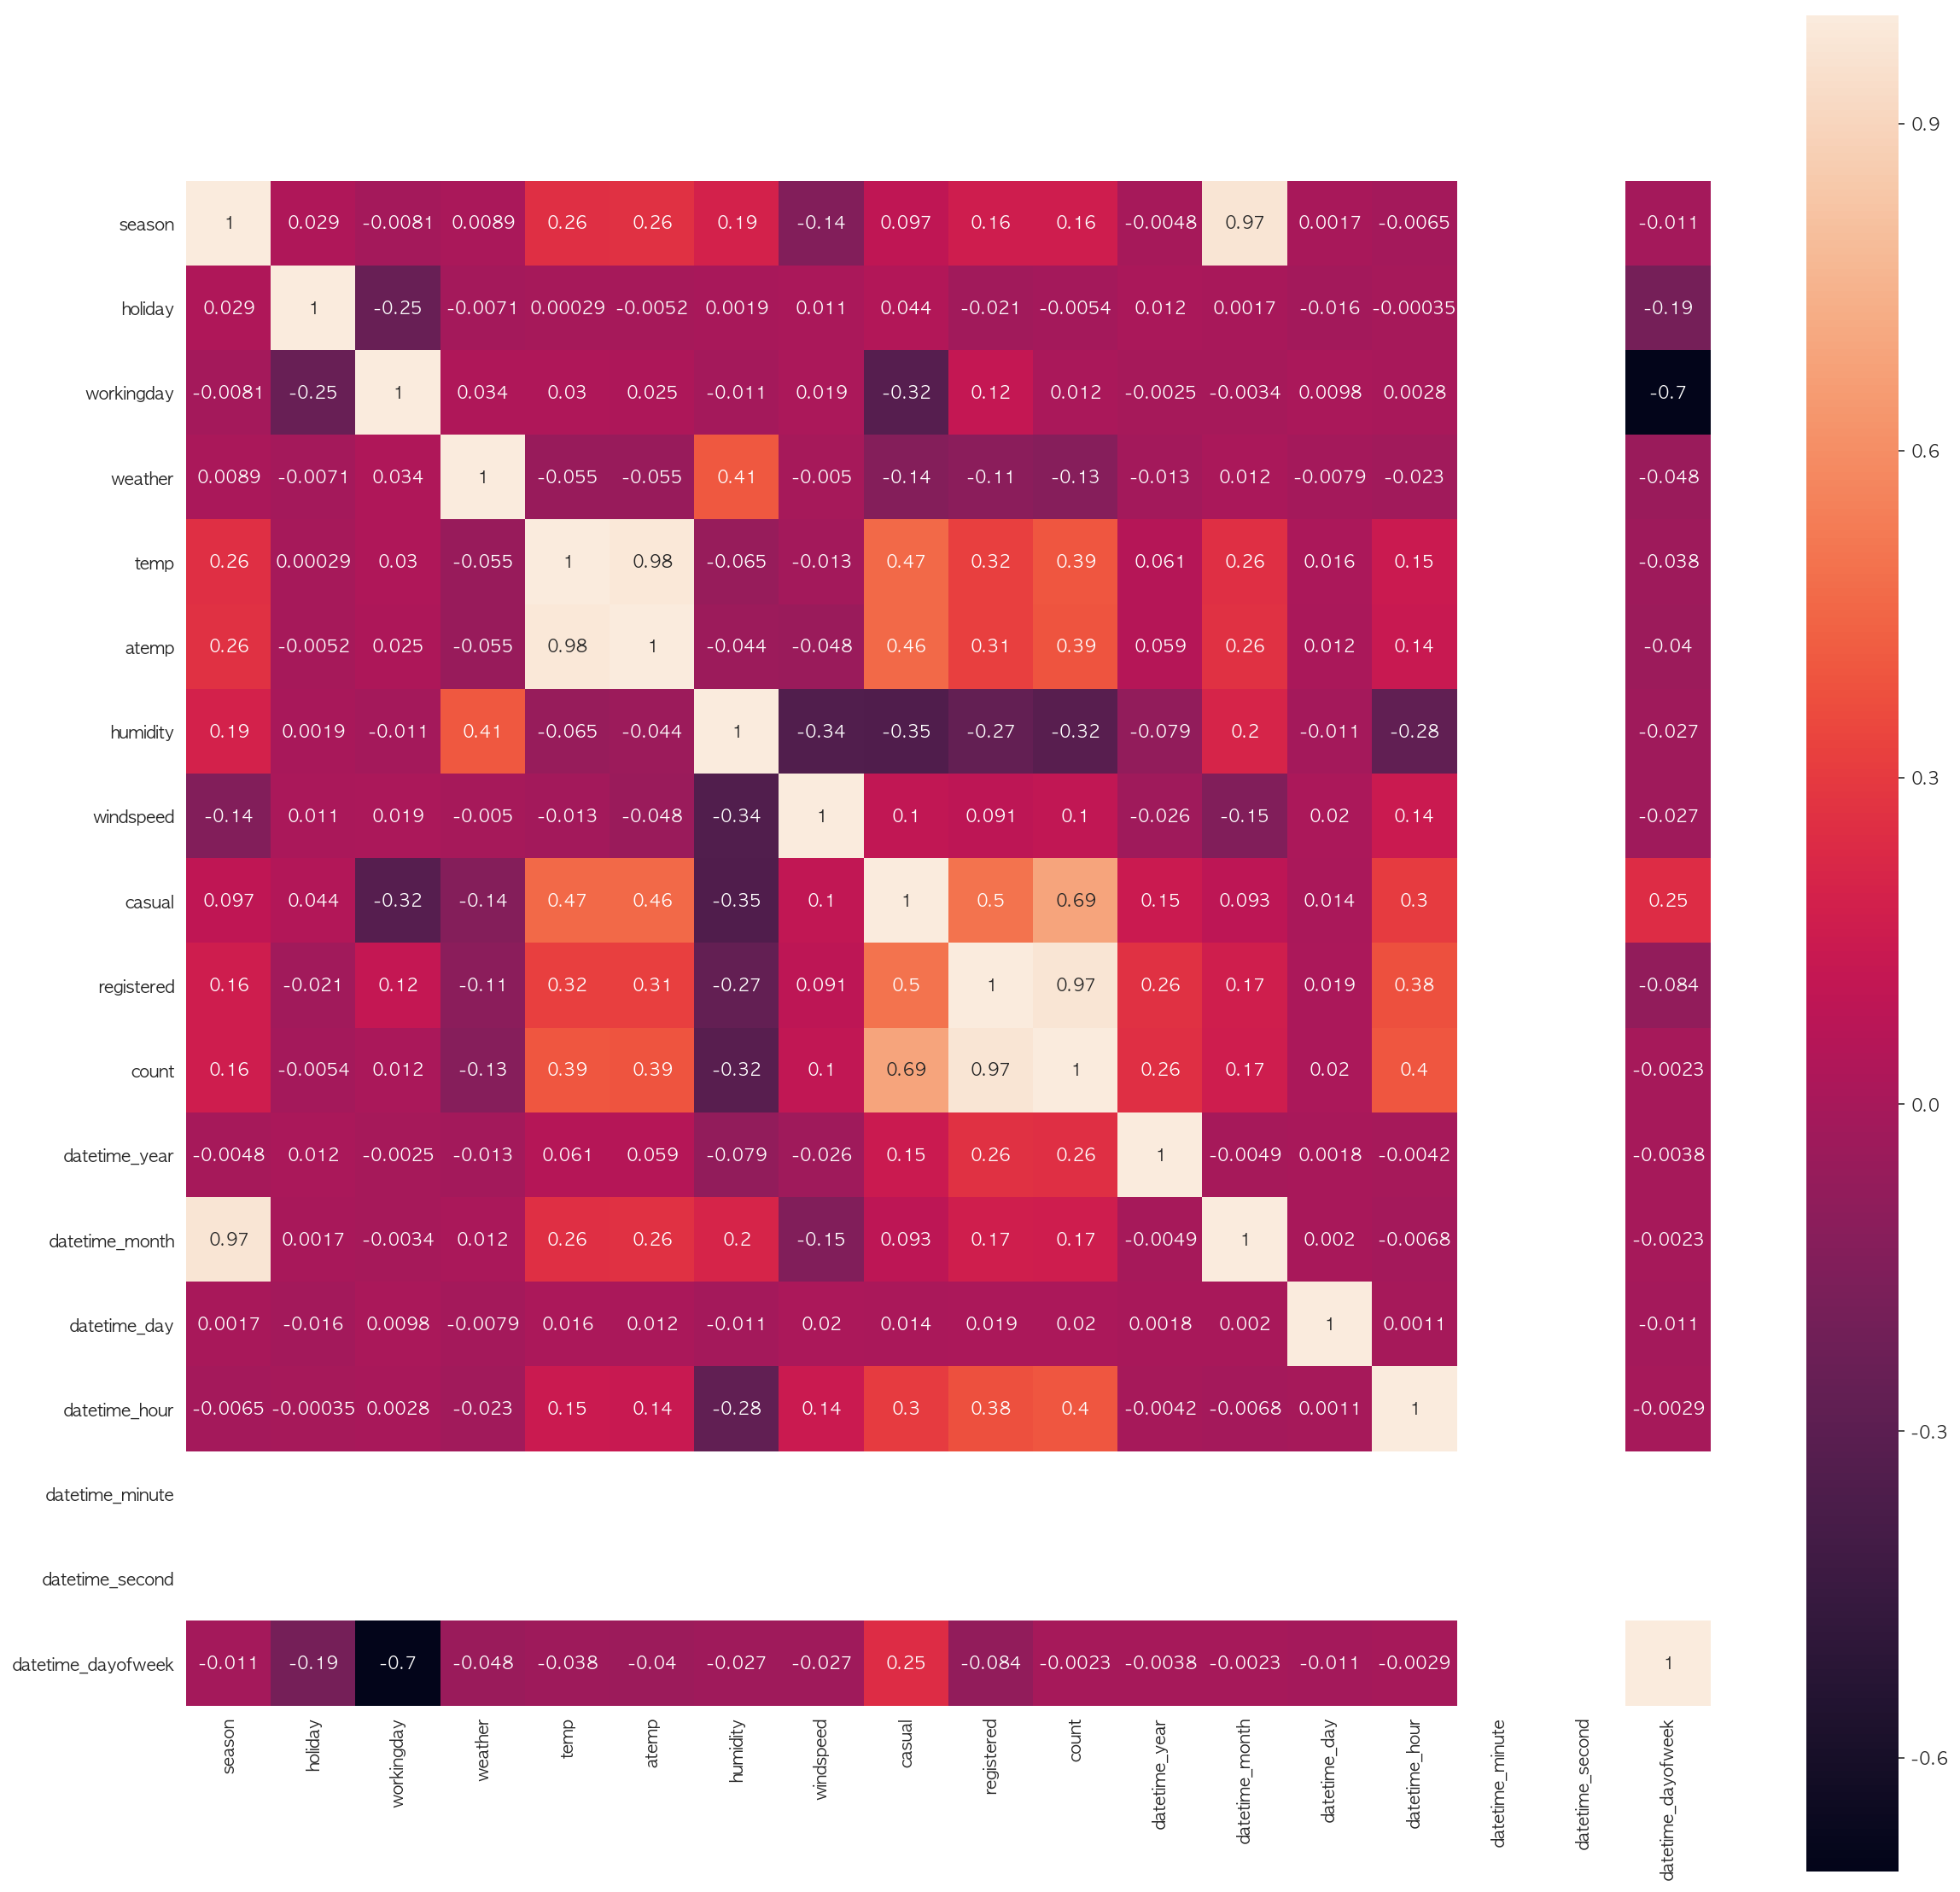

In [12]:
# 각 상관관계를 통해 어떤 것이 연관성이 높은지 조사해본다
# hour의 상관성이 제일 높다. 이를 분석해볼 필요가 있다 

fig=plt.figure(figsize=[20,20])
sns.heatmap(train.corr(),annot=True,square=True)

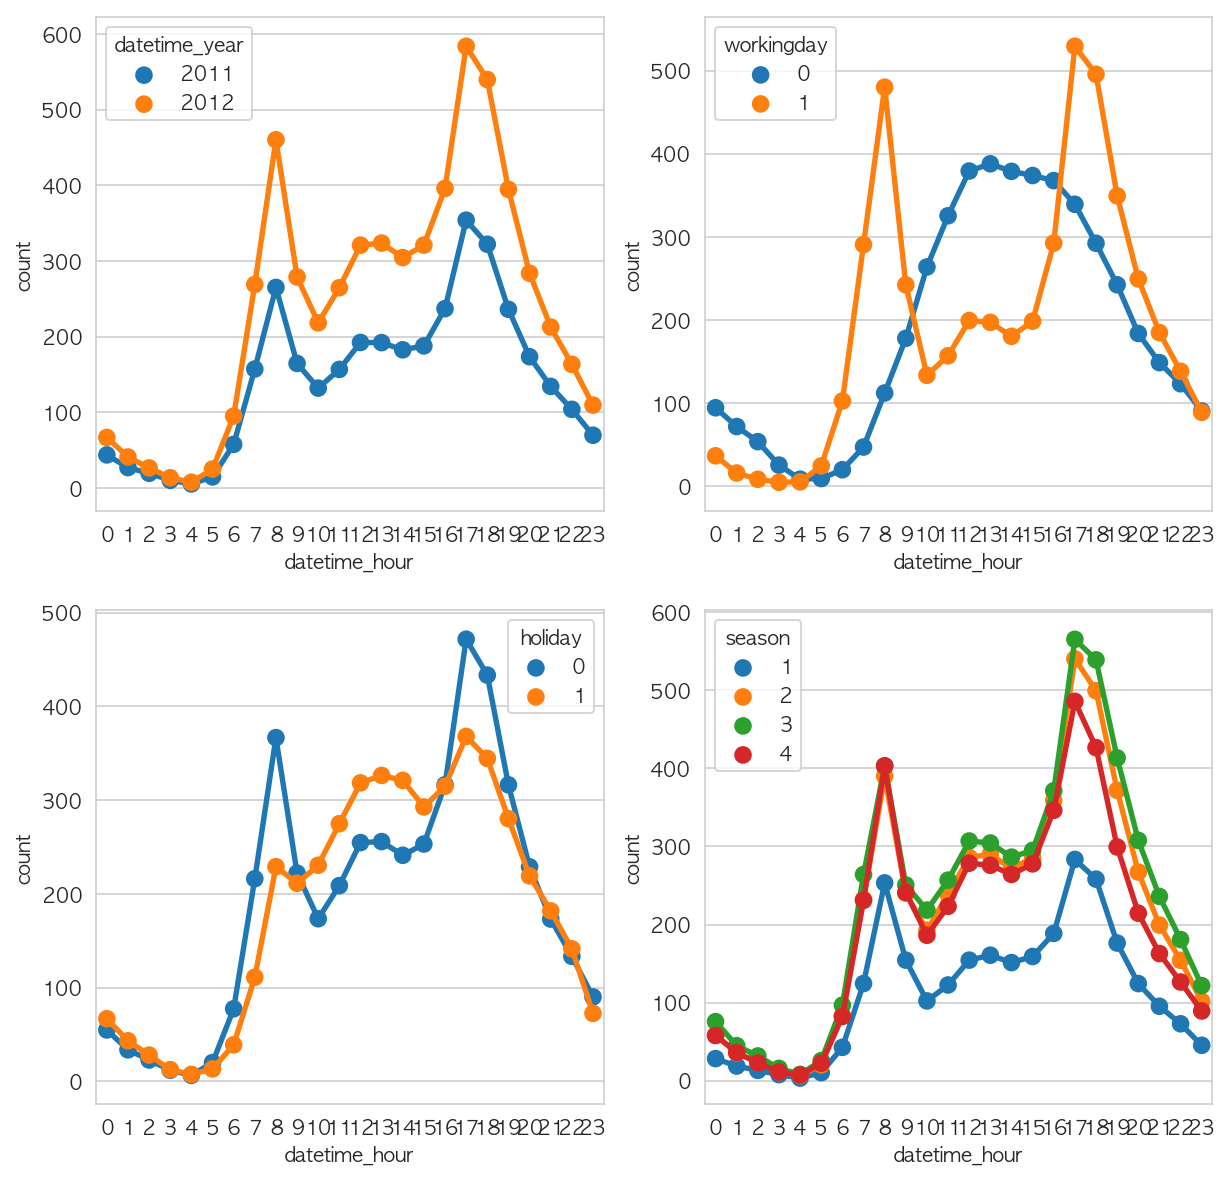

In [19]:
fig=plt.figure(figsize=[10,10])
ax1=fig.add_subplot(2,2,1)
ax1=sns.pointplot(x="datetime_hour",y="count",hue="datetime_year",data=train.groupby(["datetime_hour","datetime_year"])["count"].mean().reset_index())
# 2011,2012 둘다 동일한 흐름을 보인다

ax1=fig.add_subplot(2,2,2)
ax1=sns.pointplot(x="datetime_hour",y="count",hue="workingday",data=train.groupby(["datetime_hour","workingday"])["count"].mean().reset_index())
# 일하는날 자전거 타는 비중이 절대적으로 높다 / 10~16시까지는 일안하는날 타는 비중이 더 높다 

ax1=fig.add_subplot(2,2,3)
ax1=sns.pointplot(x="datetime_hour",y="count",hue="holiday",data=train.groupby(["datetime_hour","holiday"])["count"].mean().reset_index())
# 휴일 역시 10-16시 비중이 높음. 이는 주말과 휴일이 겹친날이 어느정도 많이 있고 -> 이에 따른 결과일 가능성이 높음을 나타낸다

ax1=fig.add_subplot(2,2,4)
ax1=sns.pointplot(x="datetime_hour",y="count",hue="season",data=train.groupby(["datetime_hour","season"])["count"].mean().reset_index())

### 2)year.month 분석

In [20]:
# 따로 하면 나오는게 없고 특히 2012년에 count절대수가 더 많음에도 불구하고 총 그래프는 7,8,9에 특히 2011년걸 따라가는게 수상하다
# 이럴 경우에는 이 두개를 합쳐서 추이를 따져봐야한다는말임

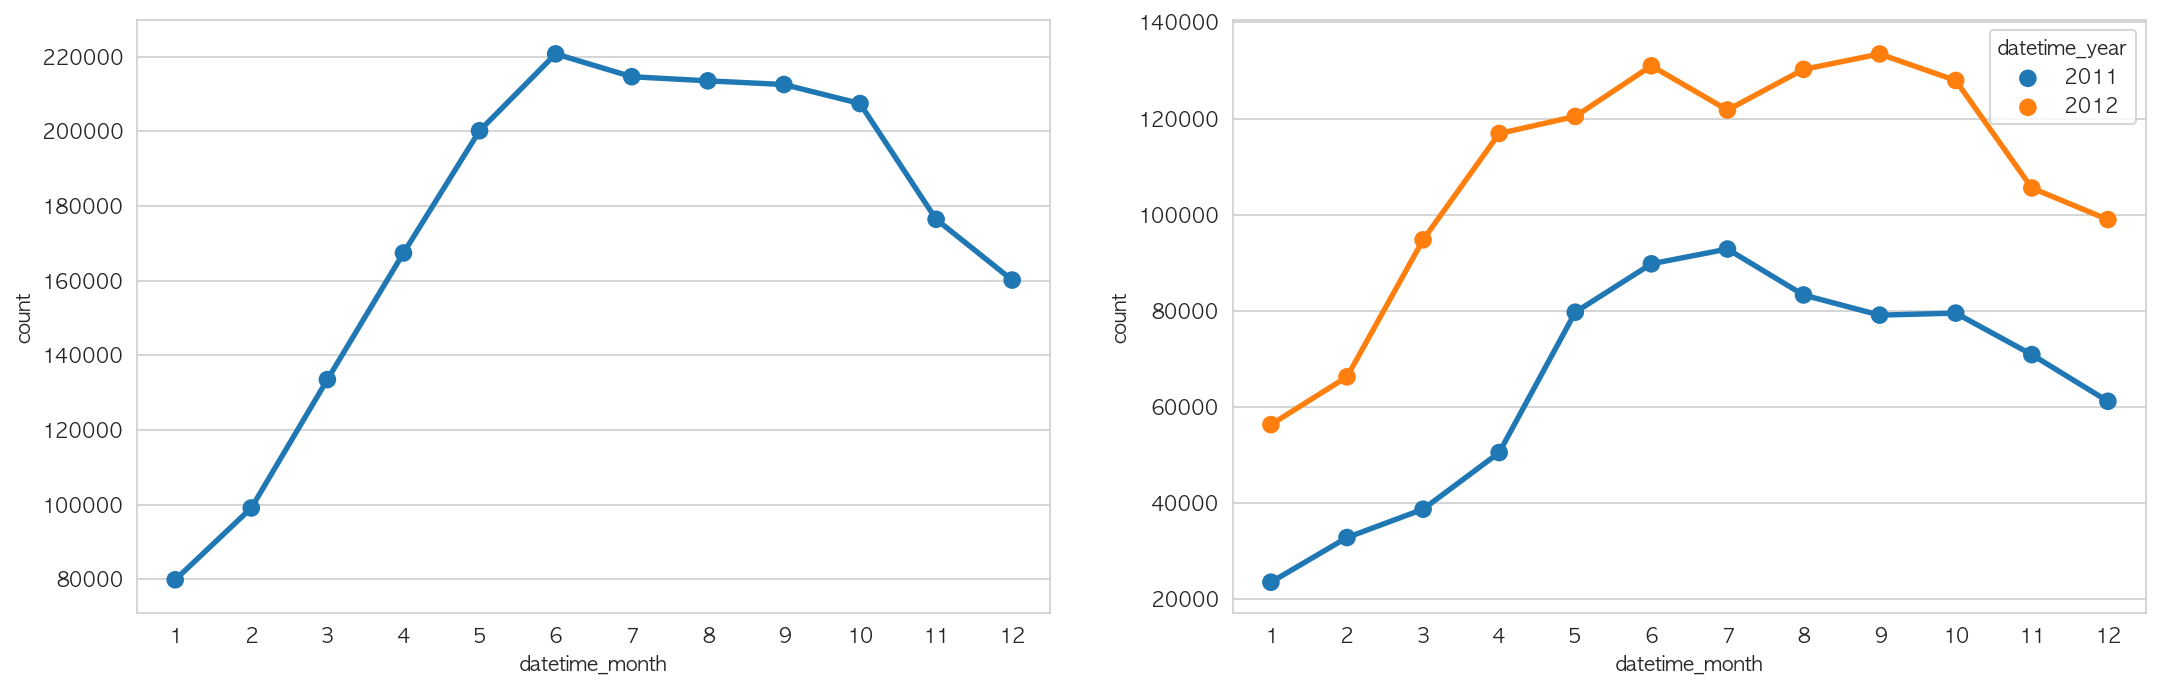

In [21]:
fig=plt.figure(figsize=[18,12])
ax1=fig.add_subplot(2,2,1)
ax1=sns.pointplot(x="datetime_month",y="count",data=train.groupby(["datetime_month"])["count"].sum().reset_index())

ax1=fig.add_subplot(2,2,2)
ax1=sns.pointplot(x="datetime_month",y="count",hue="datetime_year",data=train.groupby(["datetime_month","datetime_year"])["count"].sum().reset_index())


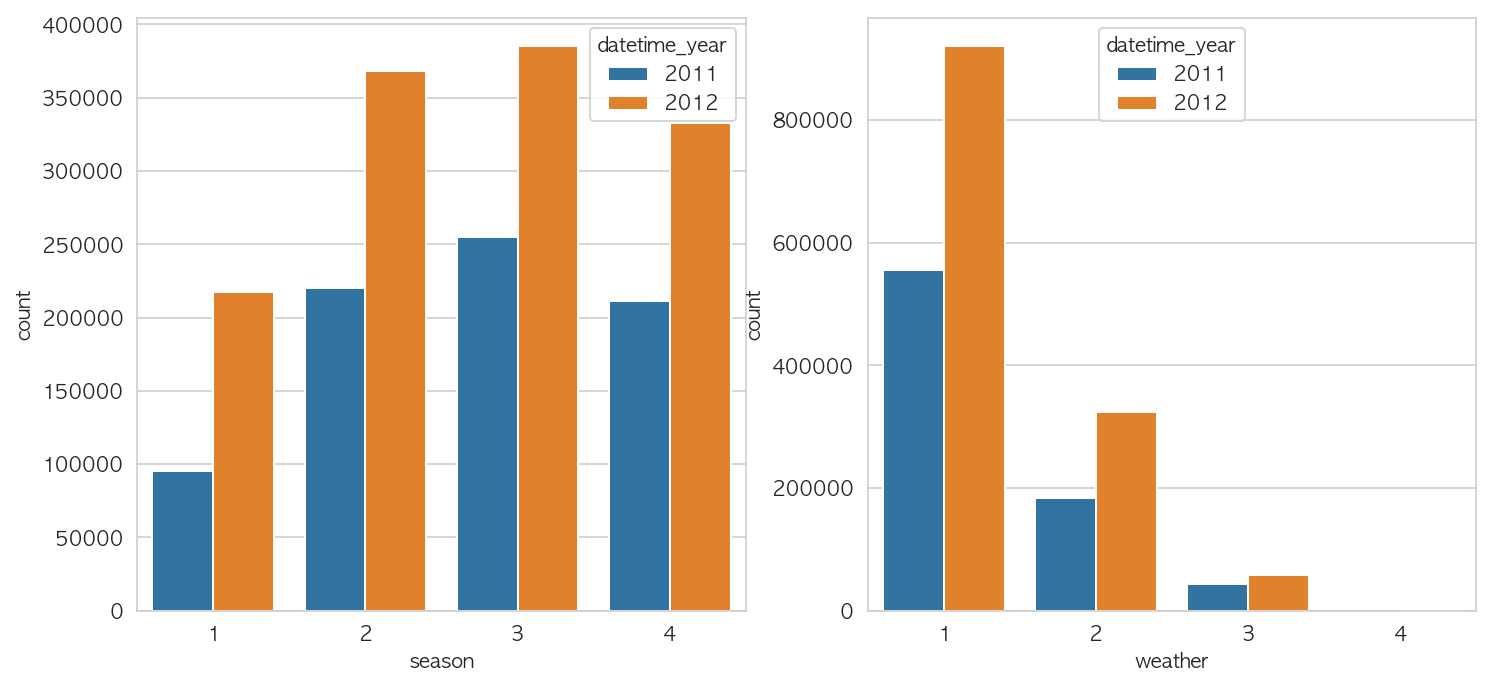

In [22]:
# 지금 이 그래프로는 영향 및 의문점을 찾을 수가 없다. 
# 2011년보다 2012년이 모두 더 높다는점 / 마찬가지로 시즌으로 나누어봐도 2012년이 더 높다
# 이는 단순하게 년도나 시즌으로 나누어서 보는게 아니라 합쳐서 시간적인 부분을 파악해야 한다는 것이다

fig=plt.figure(figsize=[12,12])
ax1=fig.add_subplot(2,2,1)
ax1=sns.barplot(x="season",y="count",hue="datetime_year",\
                data=train.groupby(["season","datetime_year"])["count"].sum().reset_index())

ax1=fig.add_subplot(2,2,2)
ax1=sns.barplot(x="weather",y="count",hue="datetime_year",\
                data=train.groupby(["weather","datetime_year"])["count"].sum().reset_index())

In [23]:
train["datetime_year(str)"]=train["datetime_year"].astype("str")
train["datetime_month(str)"]=train["datetime_month"].astype("str")
train["datetime_year_month"]=train["datetime_year"].astype("str")+"-"+train["datetime_month"].astype("str")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,datetime_dayofweek,datetime_year(str),datetime_month(str),datetime_year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,9.70160,3,13,16,2011,1,1,0,0,0,5,2011,1,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,9.70093,8,32,40,2011,1,1,1,0,0,5,2011,1,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,8.60146,5,27,32,2011,1,1,2,0,0,5,2011,1,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,7.20250,3,10,13,2011,1,1,3,0,0,5,2011,1,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,7.30233,0,1,1,2011,1,1,4,0,0,5,2011,1,2011-1


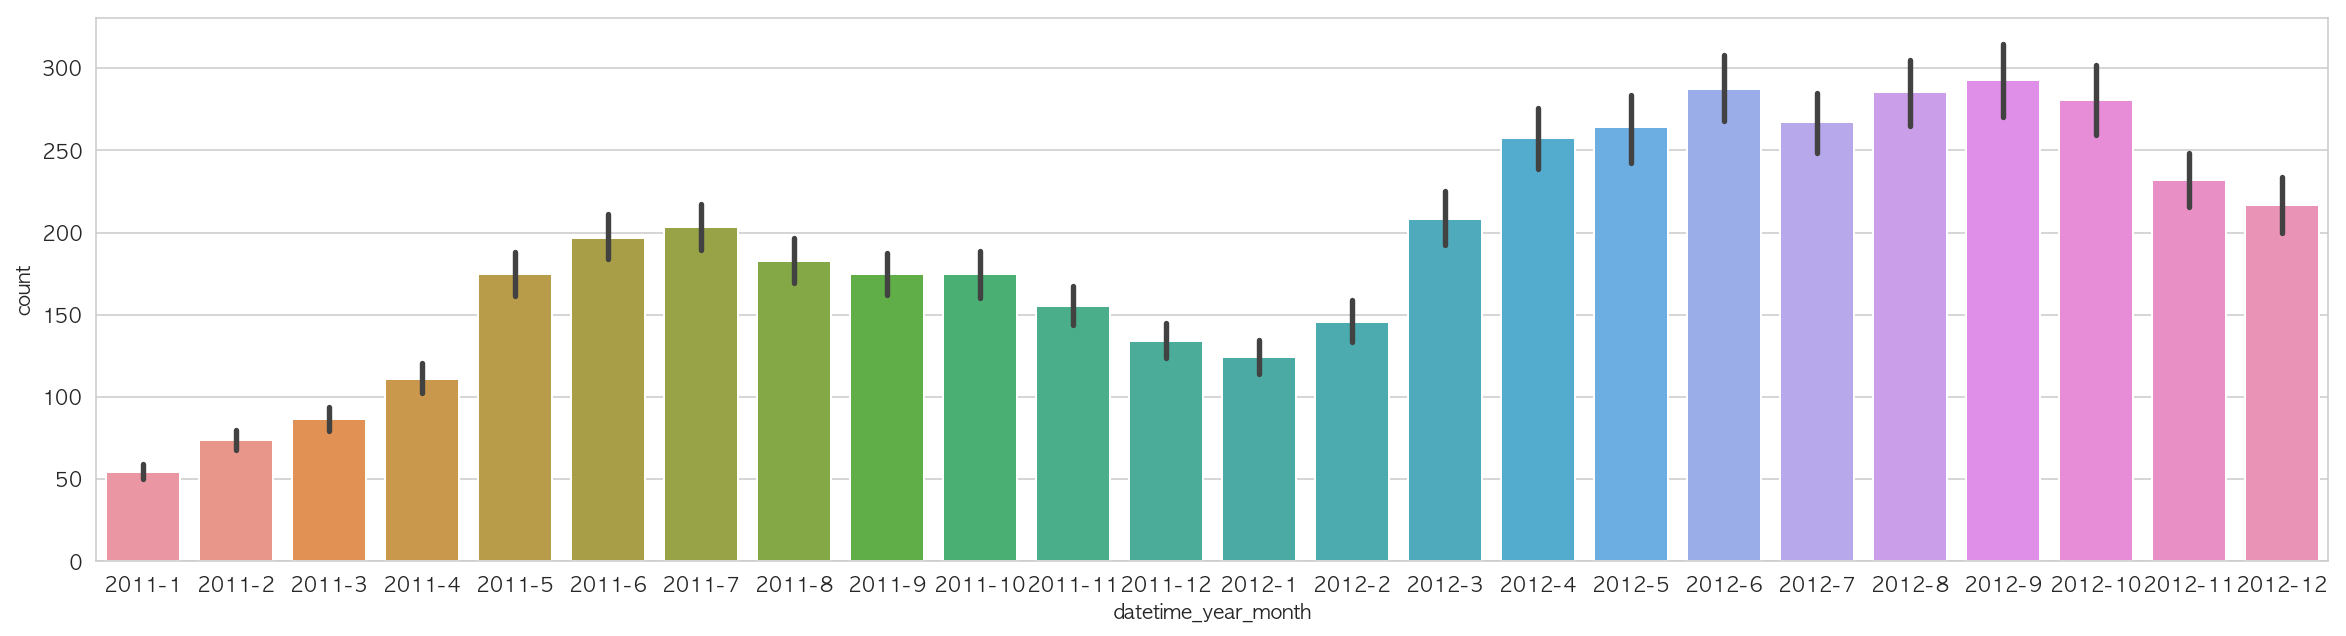

In [24]:
# 달을 합쳐서 시간순으로 보았음.

fig=plt.figure(figsize=[20,5])
ax1=fig.add_subplot(1,1,1)
ax1=sns.barplot(x="datetime_year_month",y="count",data=train)

# 2011년에는 7-9월의 하락이 있었느나 2012년은 성장 -> 잘했다는 것

###  3)day-hour 분석

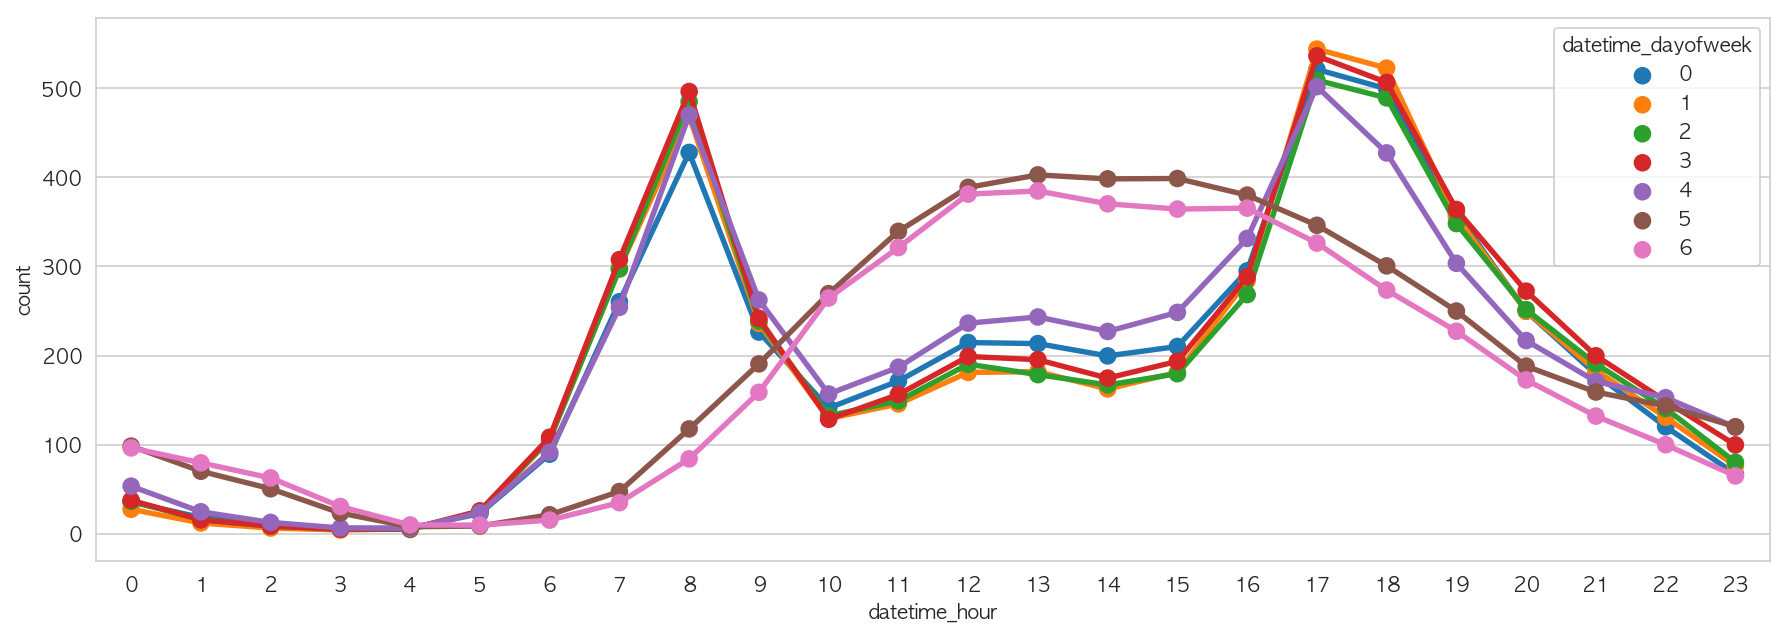

In [25]:
fig=plt.figure(figsize=[15,5])
ax1=fig.add_subplot(1,1,1)
ax1=sns.pointplot(x="datetime_hour",y="count",hue="datetime_dayofweek",data=train.groupby(["datetime_hour","datetime_dayofweek"])["count"].mean().reset_index())

# 월요일 금요일중 누가 더 휴무를 많이내고 누가더 자전거 많이타냐

# 0-4hour -> 토요일새벽부터 일요일새벽까지 타는 인원이 제일 많음 / 금요일새벽-토요일아침 / 목요일새벽-금요일새벽
# 4-5hour -> 평일 대부분 일한다 
# 5hour -> 5시 이후부터 대부분 출근이 시작됨 그래서 자전거 수요가 급증 / 월금은 연차나 휴가낸 사람들이 많다는걸 반증
# 6-8시 본격적인 출근시간인데 -> 수목이 많다는건 월화는 대중교통을 이용할 수 있다는 이야기 
# 금토일로 연차나 휴가를 낸 사람들이 토일월로 낸 사람보다 자전거 더 많이 이용 -> 운동을 더 많이 할수도 있고 더 다른데 갈수도 잇고 
# 그래프상 화요일이 연치가 가장 많을걸로 추측할 수 있다 ->holiday그래프와 유사함
# 그래프상에서보면 토일월<금토일로 연차를 더 많이 낸 사람들이 자전거를 많이타고 /월요일은 새벽에는 힘들어서 그냥 대중교통 후 퇴근부터 자전거이용
# 금요일날 퇴근하고 집가지 않고 놀거나 / 연차낸사람들이 오후에 타고 지금은 안타거나 


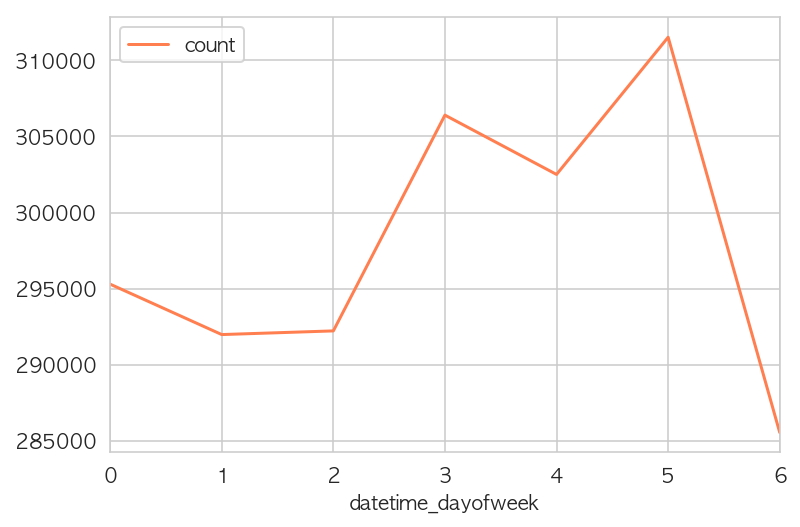

In [184]:
week = pd.pivot_table(index=["datetime_dayofweek"],values="count",data=train,aggfunc=np.sum)

# 주말을 들여다보았을 때 토요일이 가장 높고 일요일이 제일 낮다 
week.plot(kind = "line", color = "coral")

###  4)distplot

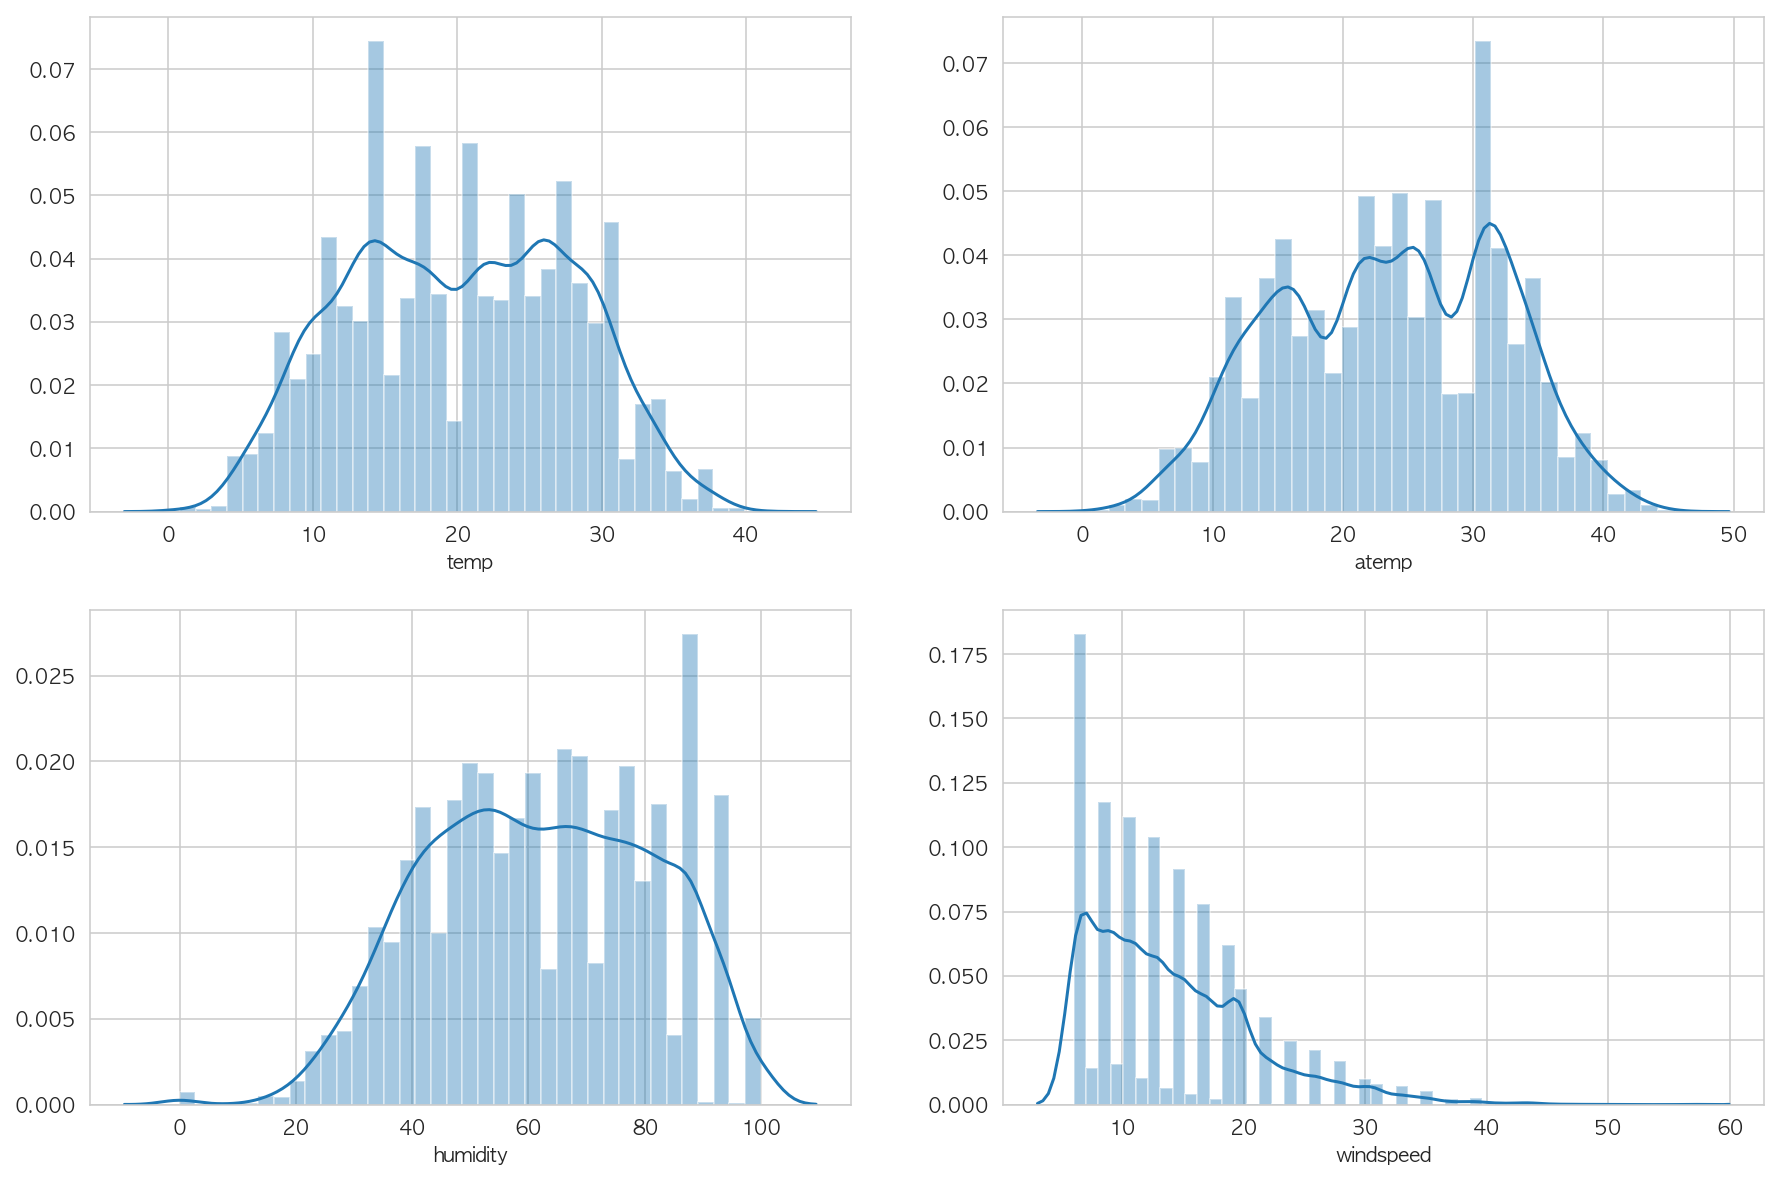

In [27]:
fig=plt.figure(figsize=[15,10])
ax1=fig.add_subplot(2,2,1)
ax1=sns.distplot(train["temp"])

ax1=fig.add_subplot(2,2,2)
ax1=sns.distplot(train["atemp"])

ax1=fig.add_subplot(2,2,3)
ax1=sns.distplot(train["humidity"])

ax1=fig.add_subplot(2,2,4)
ax1=sns.distplot(train["windspeed"])

### windchill형성 -> 다른 부수적 효과 알아보기

In [28]:
# 공식을 찾아보고 이를 대입시켜서 
## 바람의 강도세기에 따른 이상적 수치를 찾아본다 

windchill=0.6215*(train["temp"])+35.74-35.75*(train["windspeed"]**0.16)+0.4275*(train["windspeed"]**0.16)
windchill[0:10]

0     -8.954110
1     -9.463178
2     -8.494638
3     -6.589417
4     -6.696232
6     -9.629067
7    -10.929287
8     -8.699256
9    -10.467831
64    -9.004268
dtype: float64

In [29]:
train["windchill"]=windchill
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,datetime_dayofweek,datetime_year(str),datetime_month(str),datetime_year_month,windchill
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,9.70160,3,13,16,2011,1,1,0,0,0,5,2011,1,2011-1,-8.954110
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,9.70093,8,32,40,2011,1,1,1,0,0,5,2011,1,2011-1,-9.463178
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,8.60146,5,27,32,2011,1,1,2,0,0,5,2011,1,2011-1,-8.494638
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,7.20250,3,10,13,2011,1,1,3,0,0,5,2011,1,2011-1,-6.589417
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,7.30233,0,1,1,2011,1,1,4,0,0,5,2011,1,2011-1,-6.696232


In [30]:
windchill=0.6215*(test["temp"])+35.74-35.75*(test["windspeed"]**0.16)+0.4275*(test["windspeed"]**0.16)
test["windchill"]=windchill
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,datetime_dayofweek,windchill
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3,-17.126237
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3,42.365190
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3,42.365190
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3,-9.476972
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3,-9.476972


### humidity와 temp를 통한 자전거 타기 좋은 온도 여부 파악하기

In [31]:
# 기존 데이터를 활용하여 새로운 정보를 추출해낸다
##  temp / humidity를 통해 새로운 공식을 대입하여 새로운 조건을 생성해본다

train["bad_humidity"]=9/5*train["temp"]-0.55*(1-train["humidity"]/100)*(9/5*train["temp"]-26)+32
test["bad_humidity"]=9/5*test["temp"]-0.55*(1-test["humidity"]/100)*(9/5*test["temp"]-26)+32

train.head()
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,datetime_dayofweek,windchill,bad_humidity
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3,-17.126237,52.836504
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3,42.365190,52.836504
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3,42.365190,52.836504
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3,-9.476972,52.836504
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3,-9.476972,52.836504


In [32]:
train.loc[train["bad_humidity"]>80,"humidity2"]="Terrible"
train.loc[train["bad_humidity"]<80,"humidity2"]="Bad"
train.loc[train["bad_humidity"]<75,"humidity2"]="SOSO"
train.loc[train["bad_humidity"]<68,"humidity2"]="Good"
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,datetime_dayofweek,datetime_year(str),datetime_month(str),datetime_year_month,windchill,bad_humidity,humidity2
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,9.70160,3,13,16,2011,1,1,0,0,0,5,2011,1,2011-1,-8.954110,50.578096,Good
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,9.70093,8,32,40,2011,1,1,1,0,0,5,2011,1,2011-1,-9.463178,49.310040,Good
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,8.60146,5,27,32,2011,1,1,2,0,0,5,2011,1,2011-1,-8.494638,49.310040,Good
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,7.20250,3,10,13,2011,1,1,3,0,0,5,2011,1,2011-1,-6.589417,50.851600,Good
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,7.30233,0,1,1,2011,1,1,4,0,0,5,2011,1,2011-1,-6.696232,50.851600,Good


In [33]:
test.loc[test["bad_humidity"]>80,"humidity2"]="Terrible"
test.loc[test["bad_humidity"]<80,"humidity2"]="Bad"
test.loc[test["bad_humidity"]<75,"humidity2"]="SOSO"
test.loc[test["bad_humidity"]<68,"humidity2"]="Good"
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,datetime_dayofweek,windchill,bad_humidity,humidity2
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3,-17.126237,52.836504,Good
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3,42.365190,52.836504,Good
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3,42.365190,52.836504,Good
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3,-9.476972,52.836504,Good
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3,-9.476972,52.836504,Good


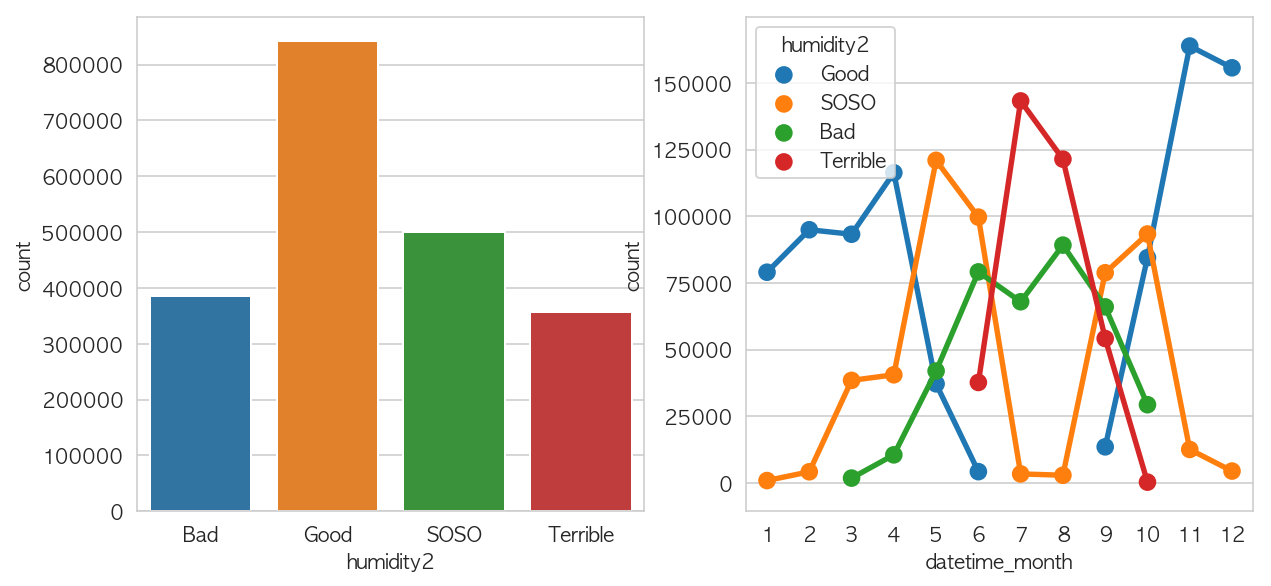

In [34]:
# 그래프를 통해서 
## 계산된 날씨가 좋은 시기에는 자전거 이용수가 많고 / 좋지 않은 날에는 이용률이 낮아진다 
## 첫번째 그래프를 통해 good을 feature_name의 변수로 적용할 수 있으나 / 이외 나머지는 넣어도 크게 변화를 줄 수 있는 여부가 없다
## soso의 경우 good과의 갭차이가 다른 두 변수의 갭차이보다 훨씬 높기에 크게 결정적인 변수라고 보기 어렵다

### 두번째 그래프에서 중요한 것은 terrible인데 날씨가 좋지 못한 여름임에도 불구하고 terrible인 시기에 이용수가 매우 높다
### 적어도 7,8월달에 한해서는 날씨의 중요성이 떨어지고 / 

### 오히려 지나치게 더운 날씨로 인해 자전거를 이용하여 출퇴근 하는 사람들이 있을 수 있고 / 방학기간 학생들의 이용수가 급등할 수도 있다
### 날씨만 보면 terrible비중이 높은 여름의 이용수가 적다고 생각할 수 있지만 / 이 그래프를 통해
### 오히려 여름때 이들을 타겟으로 할 수 있는 여러가지 프로모션을 개발한다면 이용자 수를 급증 시킬 수 있음을 볼 수 있다 


fig=plt.figure(figsize=[10,10])
ax1=fig.add_subplot(2,2,1)
ax1=sns.barplot(x="humidity2",y="count",data=train.groupby(["humidity2"])["count"].sum().reset_index())

ax1=fig.add_subplot(2,2,2)
ax1=sns.pointplot(x="datetime_month",y="count",hue="humidity2",\
                  data=train.groupby(["datetime_month","humidity2"])["count"].sum().reset_index())

# precessing

In [35]:
feature_names=["season","holiday","workingday","weather",
               "temp","humidity","windspeed","datetime_year",
               "datetime_hour","datetime_dayofweek","atemp"]
label_names="count"


In [36]:
x_train=train[feature_names]
y_train=train[label_names]
x_test=test[feature_names]

In [37]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=10,random_state=37)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

# estimation

In [46]:
from sklearn.model_selection import cross_val_predict
y_predict = cross_val_predict(model,x_train,y_train,cv=20)
y_predict

array([ 27.3,  22.9,  20.4, ..., 176.8, 169.7, 158.6])

In [39]:
abs(y_predict-y_train).mean()

32.319088584726394

In [40]:
xxx=(y_train-y_predict)**2
xxx.mean()

2703.535236667638

In [41]:
from sklearn.metrics import mean_absolute_error
score=mean_absolute_error(y_train,y_predict)
score

32.319088584726565

In [42]:
from sklearn.metrics import mean_squared_log_error
score=mean_squared_log_error(y_train,y_predict)
score=np.sqrt(score)
score


0.3837042590540849

In [43]:
f"Score={score:.5f}"

'Score=0.38370'

In [44]:
0.3837042590540849

0.3837042590540849

In [45]:
from sklearn.metrics import mean_squared_log_error
score3=mean_squared_log_error(y_train,y_predict)
score3=np.sqrt(score3)
score3

0.3837042590540849

### 최적의 max_features/max_depth 찾기 -> 1단계와 2단계의 사이 1.5단계

In [55]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [56]:
# 2가지 방법
# 공식이 없으니까 만들어서 하던가
# 그냥 predict로 밑에서 하고 위에 3가지 분석방법 중에 하나 택해서 고대로 밑에 적용한다 


from sklearn.metrics import make_scorer

def rmle(predict,actual):
    predict=np.array(predict)
    actual=np.array(actual)
    distance=abs(predict-actual)
    score=distance.mean()
    return score

socres=make_scorer(rmle)
socres

make_scorer(rmle)

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error


n_estimators=10
search=10
hyperparameters_list=[]

for randoms_search in range(search):
    max_depth=np.random.randint(low=2,high=10)
    max_features=np.random.uniform(low=0.1,high=1.0)
    
    model=RandomForestRegressor(n_jobs=-1,random_state=37,n_estimators=n_estimators,max_features=max_features,
                                max_depth=max_depth)
    score=cross_val_score(model,x_train,y_train,cv=20,scoring=socres).mean()
    
    hyperparameters={"score":score,"n_estimators":n_estimators,"max_features":max_features,"max_depth":max_depth}
    hyperparameters_list.append(hyperparameters)
    
    print(f"n_estimators={n_estimators},max_features={max_features:.6f},max_depth={max_depth},score={score}")

n_estimators=10,max_features=0.527007,max_depth=2,score=103.61788105504188
n_estimators=10,max_features=0.834315,max_depth=5,score=70.8628925681227
n_estimators=10,max_features=0.300422,max_depth=4,score=88.99096068899709
n_estimators=10,max_features=0.979369,max_depth=8,score=44.861989287654964
n_estimators=10,max_features=0.764927,max_depth=5,score=72.51652177736382
n_estimators=10,max_features=0.438965,max_depth=4,score=88.92218244134297
n_estimators=10,max_features=0.375387,max_depth=5,score=80.33398061518542
n_estimators=10,max_features=0.244950,max_depth=4,score=99.11534899298317
n_estimators=10,max_features=0.167640,max_depth=2,score=120.16505429152183
n_estimators=10,max_features=0.155587,max_depth=7,score=94.09014634885776


In [59]:
hyperparameters_list=pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list=hyperparameters_list.sort_values(by="score")
hyperparameters_list.head()

,max_depth,max_features,n_estimators,score
3,8,0.979369,10,44.861989
1,5,0.834315,10,70.862893
4,5,0.764927,10,72.516522
6,5,0.375387,10,80.333981
5,4,0.438965,10,88.922182


## <정식적인 공식이 있을경우>

In [77]:
feature_names=["season","holiday","workingday","weather",
               "temp","humidity","windspeed","datetime_year",
               "datetime_hour","datetime_dayofweek","atemp"]
label_names="count"


In [78]:
x_train=train[feature_names]
y_train=train[label_names]
x_test=test[feature_names]

In [79]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,random_state=37,n_estimators=100)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [80]:
from sklearn.metrics import make_scorer
def rmle(predict,actual):
    predict=np.array(predict)
    actual=np.array(actual)
    log_predict=np.log(predict+1)
    log_actual=np.log(actual+1)
    distance=(log_predict-log_actual)**2
    mean_distance=distance.mean()
    score=np.sqrt(mean_distance)
    return score

rmsle=make_scorer(rmle)
rmsle

make_scorer(rmle)

In [81]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x_train,y_train,cv=20,scoring=rmsle).mean()
score

0.3619754509957543

In [236]:
from sklearn.model_selection import cross_val_score

n_estimators = 4
search = 10
hyperparameters_list = []

for random_search in range(search):
    max_depth = np.random.randint(2, high = 100)
    max_features = np.random.uniform(low=0.0, high=1.0)
    
    model = RandomForestRegressor( n_estimators=n_estimators, max_depth = max_depth, max_features = max_features,\
                                  n_jobs=-1,random_state=37)
    
   # score = cross_val_score(model, x_train, y_train, cv = 20, scoring = rmsle)



In [67]:
# 바로 공식을 대입해서 진행하면 된다.

from sklearn.model_selection import cross_val_score

n_estimators=4
search=10
hyperparameters_list=[]

for random_search in range(search):
    max_depth=np.random.randint(low=2,high=100)
    max_features=np.random.uniform(low=0.1,high=1.0)
    
    model=RandomForestRegressor(n_jobs=-1,random_state=37,n_estimators=n_estimators,
                                    max_depth=max_depth,max_features=max_features)
    score=cross_val_score(model,x_train,y_train,cv=20,scoring=rmsle).mean()
        
    hyperparameters={"score":score,"n_estimators":n_estimators,"max_depth":max_depth,"max_features":max_features}
    hyperparameters_list.append(hyperparameters)
    print(f"n_estimators={n_estimators},max_depth={max_depth:.6f},max_features={max_features:.6f},score={score}")

n_estimators=4,max_depth=23.000000,max_features=0.481800,score=0.4397759344886051
n_estimators=4,max_depth=45.000000,max_features=0.422945,score=0.5078399415021708
n_estimators=4,max_depth=78.000000,max_features=0.169258,score=0.8103380198997474
n_estimators=4,max_depth=7.000000,max_features=0.774200,score=0.5089123057810638
n_estimators=4,max_depth=87.000000,max_features=0.508614,score=0.4364584035436341
n_estimators=4,max_depth=4.000000,max_features=0.415230,score=0.8303797089409309
n_estimators=4,max_depth=3.000000,max_features=0.318661,score=1.0142894939172507
n_estimators=4,max_depth=20.000000,max_features=0.928655,score=0.4005231220543588
n_estimators=4,max_depth=20.000000,max_features=0.558202,score=0.43147371767823783
n_estimators=4,max_depth=6.000000,max_features=0.852303,score=0.5810076187895022


In [68]:
hyperparameters_list=pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list=hyperparameters_list.sort_values(by="score")
hyperparameters_list.head(10)
hyperparameters_list.iloc[0]

max_depth       20.000000
max_features     0.928655
n_estimators     4.000000
score            0.400523
Name: 7, dtype: float64

# Outperform

In [69]:
### 나온 최적의 max_features,max_depth로 y_predict을 구한다 먼저 RandomForestRegressor부터 다시 세팅

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,random_state=37,n_estimators=4,max_features=0.881848,max_depth=9)
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features=0.881848, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [70]:
# 여기서 중요한건 카툰트,캐주얼을 차례로 이렇게 나눈것임. 반드시 이렇게 해라


model.fit(x_train,train["casual"])
causal_prediction=model.predict(x_test)

model.fit(x_train,train["registered"])
registerd_prediction=model.predict(x_test)

model.fit(x_train,train["count"])
count_prediction=model.predict(x_test)

prediction=np.sqrt(count_prediction*(causal_prediction+registerd_prediction))
prediction

array([ 14.2641575 ,   5.09035303,   2.91258142, ..., 102.37771934,
       100.12298916,  54.95448434])

In [71]:
submit=pd.read_csv("Desktop/phthon/Kaggle/bike-sharing.demand/sampleSubmission.csv")

In [72]:
submit["count"]=prediction

In [74]:
submit.to_csv("Desktop/phthon/Kaggle/bike-sharing.demand/final22.csv",index=False)